#Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#configurações
pd.set_option('max_colwidth', 1000)
pd.set_option('display.max_columns', 25)
plt.style.use('seaborn')



<ipython-input-2-5d2588ad031f>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


#Introdução

Essa análise procura explorar dados referentes a vendas de supermercados afim de obter informações pertinentes ao negócio, tais como receita gerada no período analisado, perfil de cliente e popularidade dos produtos disponíveis.



**Colunas do data set**:

Invoice id: número de identificação da fatura do recibo de venda gerado por computador

Branch: Filial do supercentro (estão disponíveis 3 filiais identificadas por A, B e C).

City: Localização dos supercentros

Customer type: Tipo de clientes, registado por Associados para clientes com cartão de associado e Normal para sem cartão de associado.

Gender: Tipo de gênero do cliente

Product line: Grupos de categorização geral de itens - Acessórios eletrônicos, Acessórios de moda, Alimentos e bebidas, Saúde e beleza, Casa e estilo de vida, Esportes e viagens

Unity price: Preço de cada produto em $

Quantity: Número de produtos adquiridos pelo cliente

Tax: taxa de imposto de 5% para compra do cliente

Total: Preço total incluindo impostos

Date: Data da compra (Registro disponível de janeiro de 2019 a março de 2019)
Horário: Horário de compra (10h às 21h)

Payment: Pagamento utilizado pelo cliente para compra (3 métodos disponíveis – Dinheiro, Cartão de crédito e Ewallet)

COGS: Custo dos produtos vendidos

Gross margin percentage: Porcentagem da margem bruta

gross income: Renda bruta

Rating: classificação de estratificação do cliente em sua experiência geral de compra (em uma escala de 1 a 10)



#Dataset

In [ ]:
sm = pd.read_csv('supermarket_sales - Sheet1.csv')

#Primeiras inspecções

In [ ]:
sm

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [ ]:
sm.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [ ]:
sm.shape

(1000, 17)

In [ ]:
sm.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [ ]:
sm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [ ]:
#dados faltantes
sm.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

#Análise exploratória

Análise univariada para melhor entendimento de cada variável.

##Branch

Nome/marca das filiais.

In [ ]:
sm['Branch'].head()

0    A
1    C
2    A
3    A
4    A
Name: Branch, dtype: object

In [ ]:
sm['Branch'].tail()

995    C
996    B
997    A
998    A
999    A
Name: Branch, dtype: object

In [ ]:
sm['Branch'].unique()

array(['A', 'C', 'B'], dtype=object)

Existem apenas três supercenter no conjunto de dados.

In [ ]:
sm['Branch'].value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

O supercenter A é o que apresenta mais registros no conjunto de dados, seguido pelo B e o C, respectivamente.
Entretanto a diferença de registros é pequena.

##City

Cidades nas quais as filiais estão situadas.

In [ ]:
sm['City'].head()

0       Yangon
1    Naypyitaw
2       Yangon
3       Yangon
4       Yangon
Name: City, dtype: object

In [ ]:
sm['City'].unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

Como esperado, as filiais são situadas em três cidades diferentes.

##Customer type

Categoria de cliente.

In [ ]:
sm['Customer type'].head()

0    Member
1    Normal
2    Normal
3    Member
4    Normal
Name: Customer type, dtype: object

In [ ]:
sm['Customer type'].tail()

995    Normal
996    Normal
997    Member
998    Normal
999    Member
Name: Customer type, dtype: object

In [ ]:
sm['Customer type'].unique()

array(['Member', 'Normal'], dtype=object)

Existem apenas dois tipos de clientes, membros e normais.

In [ ]:
sm['Customer type'].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

Há mais membros que clientes normais, mas a diferença é de apenas dois clientes. Basicamente estão equiparados.

##Gender

Gênero dos clientes.

In [ ]:
sm['Gender']

0      Female
1      Female
2        Male
3        Male
4        Male
        ...  
995      Male
996    Female
997      Male
998      Male
999    Female
Name: Gender, Length: 1000, dtype: object

In [ ]:
sm['Gender'].unique()

array(['Female', 'Male'], dtype=object)

[Text(0, 0, '50%'), Text(0, 0, '50%')]

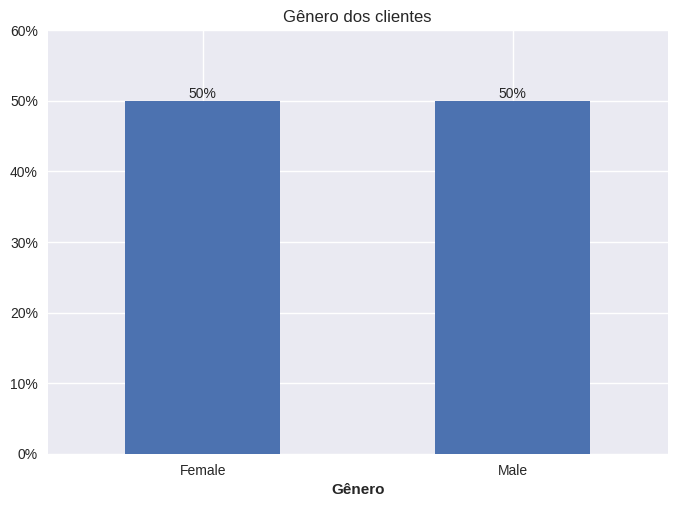

In [ ]:
gen_count = sm['Gender'].value_counts(1).round(2)

ax = gen_count.plot(kind='bar')
plt.title("Gênero dos clientes")
plt.xlabel("Gênero", weight='heavy')
plt.xticks(rotation=0)

#formatando y
valores_atuais = plt.gca().get_yticks() #recolhendo as posições atuais
ax.yaxis.set_ticks(valores_atuais) #configurando novas posições
plt.gca().set_yticklabels(['{:,.0%}'.format(i) for i in valores_atuais]) #formatando as labels

#bar_labels
ax.bar_label(ax.containers[0], fmt='{:,.0%}')

A divisão dos clientes quanto ao gênero é balanceada. Metade homens, metade mulheres, praticamente.

##Product line

Linha do produto, diz respeito à natureza do produto oferecido.

In [ ]:
sm['Product line']

0           Health and beauty
1      Electronic accessories
2          Home and lifestyle
3           Health and beauty
4           Sports and travel
                ...          
995         Health and beauty
996        Home and lifestyle
997        Food and beverages
998        Home and lifestyle
999       Fashion accessories
Name: Product line, Length: 1000, dtype: object

In [ ]:
#valores únicos
sm['Product line'].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

In [ ]:
sm['Product line'].nunique()

6

Existem 6 categorias diferentes de produtos registrados no banco de dados.

In [ ]:
#catégorias mais populares
sm['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

Fashion é a categoria de produtos com maior saída, seguida por comida e bebidas. Saúde e beleza é a categoria com menos saídas.

[Text(0, 0, '178'),
 Text(0, 0, '174'),
 Text(0, 0, '170'),
 Text(0, 0, '166'),
 Text(0, 0, '160'),
 Text(0, 0, '152')]

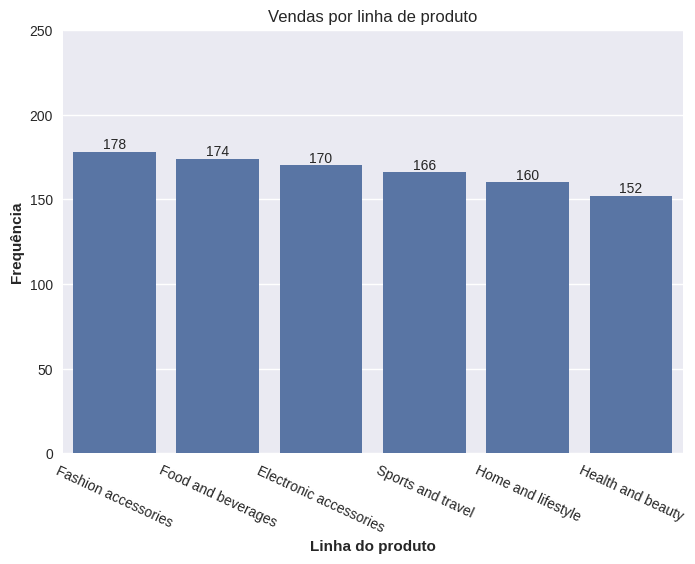

In [ ]:
ax = sns.barplot(sm['Product line'].value_counts())

plt.ylim(0,250)
plt.xticks(rotation=-25)
plt.xlabel("Linha do produto", weight = 'heavy')
plt.ylabel("Frequência", weight = 'heavy')
plt.title('Vendas por linha de produto', weight = 'light')

#barlabel

ax.bar_label(ax.containers[0], fontsize='10')


#Unit price

Preço unitário dos produtos.

In [ ]:
sm['Unit price']

0      74.69
1      15.28
2      46.33
3      58.22
4      86.31
       ...  
995    40.35
996    97.38
997    31.84
998    65.82
999    88.34
Name: Unit price, Length: 1000, dtype: float64

In [ ]:
#Informações estatísticas básicas
sm['Unit price'].describe()

count    1000.000000
mean       55.672130
std        26.494628
min        10.080000
25%        32.875000
50%        55.230000
75%        77.935000
max        99.960000
Name: Unit price, dtype: float64

O preço unitário médio é **55,67**.

O menor valor unitário de um produto é **10,08**.

O maior preço unitário registrado é **99,96**.

(0.0, 140.0)

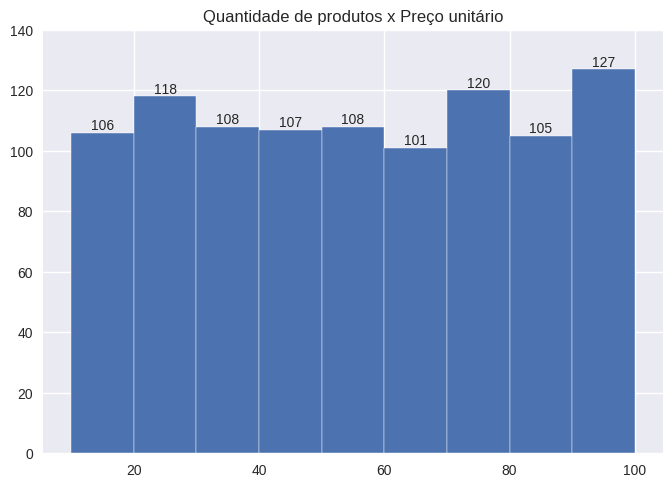

In [ ]:
bins = [10,20,30,40,50,60,70,80,90,100]
counst, edges, bars = plt.hist(sm['Unit price'], bins=bins, edgecolor = 'white')

#rótulos barras
plt.bar_label(bars)
plt.title("Quantidade de produtos x Preço unitário")
plt.ylim(0,140)

#Quantity

Quantidade do produto na venda.

In [ ]:
sm['Quantity'].describe()

count    1000.000000
mean        5.510000
std         2.923431
min         1.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: Quantity, dtype: float64

A quantidade média de produtos em cada venda é **5,5**.

A quantidade mínima de produtos numa foi **1**.

O máximo de produtos vendidos numa única venda foi **10**.

In [ ]:
sm['Quantity'].value_counts()

10    119
1     112
4     109
7     102
5     102
6      98
9      92
2      91
3      90
8      85
Name: Quantity, dtype: int64

Text(0, 0.5, 'Frequência')

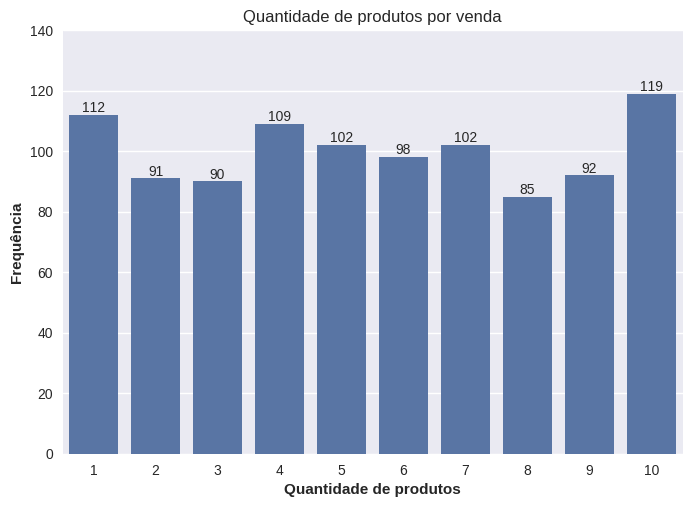

In [ ]:
ax = sns.barplot(sm['Quantity'].value_counts())

#label
ax.bar_label(ax.containers[0],fontsize='10')

#config
plt.title('Quantidade de produtos por venda')
plt.ylim(0, 140)
plt.xlabel('Quantidade de produtos', weight = 'heavy')
plt.ylabel('Frequência', weight = 'heavy')

#Tax 5%

Impostos de 5% sobre o total comprado, considerando valor do produto e quantidade de itens comprados.

In [ ]:
sm['Tax 5%']

0      26.1415
1       3.8200
2      16.2155
3      23.2880
4      30.2085
        ...   
995     2.0175
996    48.6900
997     1.5920
998     3.2910
999    30.9190
Name: Tax 5%, Length: 1000, dtype: float64

In [ ]:
#informações estatísticas básicas
sm['Tax 5%'].describe()

count    1000.000000
mean       15.379369
std        11.708825
min         0.508500
25%         5.924875
50%        12.088000
75%        22.445250
max        49.650000
Name: Tax 5%, dtype: float64

O valor médio que se paga em impostos por compra é de **15,37**.

O menor valor pago em impostos por compra foi de **0,50**.

O maior valor pago em impostos por compra foi de **49,65**.

#Total

Valor total da compra com impostos inclusos.

In [ ]:
#informações estítiscas básicas.
sm['Total'].describe()

count    1000.000000
mean      322.966749
std       245.885335
min        10.678500
25%       124.422375
50%       253.848000
75%       471.350250
max      1042.650000
Name: Total, dtype: float64

O valor médido pago em compras é de **322,97**.

O menor valor pago numa compra foi de **10,68**.

O maior valor pago numa compra foi de **1042,65**.


(0.0, 1400.0)

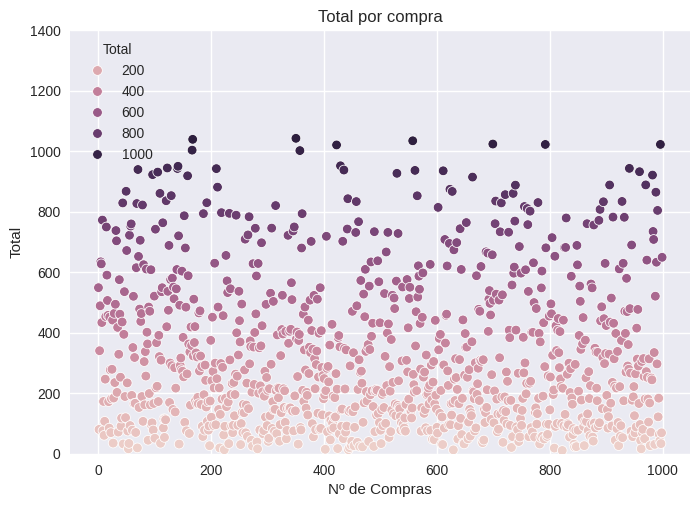

In [ ]:
sns.scatterplot(data=sm, x = sm.index,y = sm['Total'], hue = "Total" )
plt.title("Total por compra")
plt.xlabel("Nº de Compras")
plt.ylim(0,1400)


#Date

Data da venda.

In [ ]:
sm['Date']

0       1/5/2019
1       3/8/2019
2       3/3/2019
3      1/27/2019
4       2/8/2019
         ...    
995    1/29/2019
996     3/2/2019
997     2/9/2019
998    2/22/2019
999    2/18/2019
Name: Date, Length: 1000, dtype: object

In [ ]:
sm['Date'].describe()

count         1000
unique          89
top       2/7/2019
freq            20
Name: Date, dtype: object

O dia com mais vendas registradas foi 2/7/2019.

**Pergunta**: Qual mês teve a maior quantidade de vendas?

In [ ]:
#transformando para date-date
sm['Date'] = pd.to_datetime(sm['Date'])

In [ ]:
sm['Date'].dtype

dtype('<M8[ns]')

In [ ]:
sm['Date']

0     2019-01-05
1     2019-03-08
2     2019-03-03
3     2019-01-27
4     2019-02-08
         ...    
995   2019-01-29
996   2019-03-02
997   2019-02-09
998   2019-02-22
999   2019-02-18
Name: Date, Length: 1000, dtype: datetime64[ns]

In [ ]:
#Mais vendas
vendas_mes = sm.groupby(sm['Date'].dt.month)['Invoice ID'].count()
vendas_mes

Date
1    352
2    303
3    345
Name: Invoice ID, dtype: int64

**Janeiro** foi o mês com mais vendas registradas (352), seguido por **Março** (345), sendo **Fevereiro** o mês com menos vendas registradas (303).

**Pergunta**: qual o mês com a melhor receita?

In [ ]:
#Maior receita
receita_mes = sm.groupby(sm['Date'].dt.month)['Total'].sum()
receita_mes

Date
1    116291.868
2     97219.374
3    109455.507
Name: Total, dtype: float64

Seguindo o esperado uma vez que **Janeiro** foi o mês com mais vendas, também foi o mês com maior receita. Sendo **fevereiro** o mês com menor receita.

[Text(0, 0, '116,291.87'), Text(0, 0, '97,219.37'), Text(0, 0, '109,455.51')]

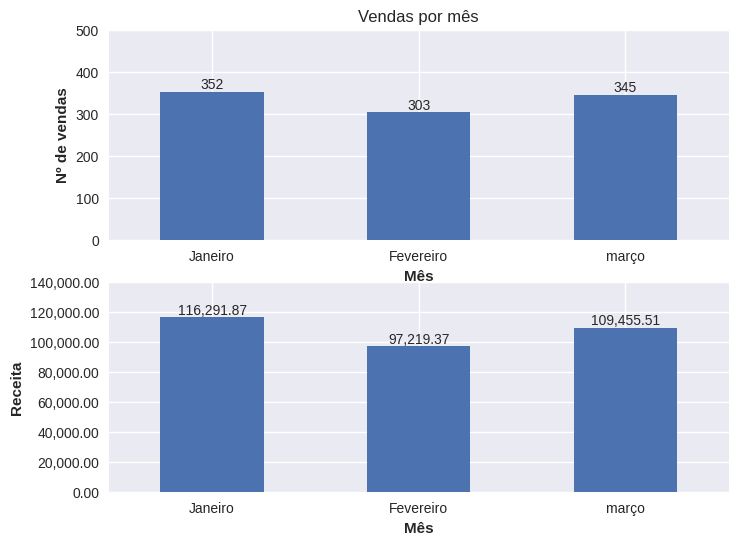

In [ ]:
plt.figure(figsize=[8,6])

#vendas
plt.subplot(211)
plt.title("Vendas por mês")
ax = vendas_mes.plot(kind='bar')
plt.ylim(0,500)
plt.xlabel("Mês",weight='heavy')
plt.xticks(np.arange(3), ['Janeiro', 'Fevereiro', 'março'], rotation=0)
plt.ylabel("Nº de vendas",weight='heavy')

#label
ax.bar_label(ax.containers[0])

#receita
plt.subplot(212)
ax=receita_mes.plot(kind='bar')
plt.ylim(0,140000)
plt.xlabel("Mês",weight='heavy')
plt.xticks(np.arange(3), ['Janeiro', 'Fevereiro', 'março'],rotation=0)
plt.ylabel("Receita",weight='heavy')

#formatando y
valores_atuais = plt.gca().get_yticks() #recolhendo as labels atuais
ax.yaxis.set_ticks(valores_atuais) #configurando o local das novas labels
plt.gca().set_yticklabels(['{:,.2f}'.format(i) for i in valores_atuais]) #atribuindo novo formato para as labels

#label
ax.bar_label(ax.containers[0],fmt='{:,.2f}') #formatando as labels
# for c in ax.containers:
  #labels=['{:,.2f}'.format(float(v.get_height())) for v in c] <- antes
  #labels=[v.get_height() for v in c] formatando as labels
  # ax.bar_label(c, label=labels, fmt='{:,.2f}')


#Time

Hora da compra (10h às 21h).


In [ ]:
sm['Time']

0      13:08
1      10:29
2      13:23
3      20:33
4      10:37
       ...  
995    13:46
996    17:16
997    13:22
998    15:33
999    13:28
Name: Time, Length: 1000, dtype: object

In [ ]:
sm['Time'].nunique()

506

In [ ]:
sm['Time'].value_counts()

19:48    7
14:42    7
17:38    6
17:16    5
11:40    5
        ..
13:26    1
11:17    1
14:57    1
17:53    1
19:12    1
Name: Time, Length: 506, dtype: int64

**pergunta:** quais horários mais movimentados, ou seja, com maiores vendas?

In [ ]:
sm_hora = pd.to_datetime(sm['Time'])

In [ ]:
sm_hora

0     2024-02-09 13:08:00
1     2024-02-09 10:29:00
2     2024-02-09 13:23:00
3     2024-02-09 20:33:00
4     2024-02-09 10:37:00
              ...        
995   2024-02-09 13:46:00
996   2024-02-09 17:16:00
997   2024-02-09 13:22:00
998   2024-02-09 15:33:00
999   2024-02-09 13:28:00
Name: Time, Length: 1000, dtype: datetime64[ns]

In [ ]:
#Horas com maiores vendas
receita_hora = sm.groupby(sm_hora.dt.hour)['Total'].sum()
receita_hora

Time
10    31421.4810
11    30377.3295
12    26065.8825
13    34723.2270
14    30828.3990
15    31179.5085
16    25226.3235
17    24445.2180
18    26030.3400
19    39699.5130
20    22969.5270
Name: Total, dtype: float64

[Text(0, 0.0, '0.00'),
 Text(0, 5000.0, '5,000.00'),
 Text(0, 10000.0, '10,000.00'),
 Text(0, 15000.0, '15,000.00'),
 Text(0, 20000.0, '20,000.00'),
 Text(0, 25000.0, '25,000.00'),
 Text(0, 30000.0, '30,000.00'),
 Text(0, 35000.0, '35,000.00'),
 Text(0, 40000.0, '40,000.00'),
 Text(0, 45000.0, '45,000.00')]

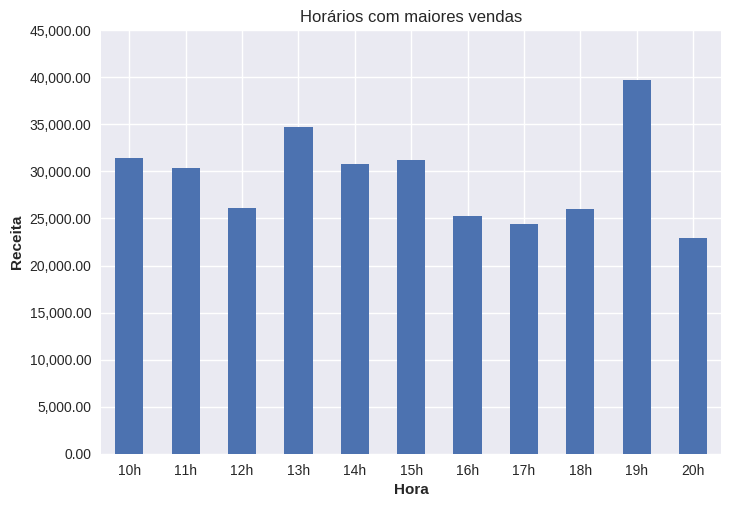

In [ ]:
labels=['10h','11h','12h','13h','14h','15h','16h','17h','18h','19h','20h'] #lebels ticks x
ax = receita_hora.plot(kind='bar',)
plt.title("Horários com maiores vendas")
plt.ylim(0,44000)
plt.xlabel("Hora", weight='heavy')
plt.ylabel("Receita", weight='heavy')
plt.xticks(np.arange(11), labels = labels, rotation=0)

#formatando ytickslabels
novos_valores = plt.gca().get_yticks()
ax.yaxis.set_ticks(novos_valores)
plt.gca().set_yticklabels(['{:,.2f}'.format(i) for i in novos_valores])

#bar label
# ax.bar_label(ax.containers[0], fmt='{:,.2f}')



#Payment

Forma de pagamento.

In [ ]:
sm['Payment']

0          Ewallet
1             Cash
2      Credit card
3          Ewallet
4          Ewallet
          ...     
995        Ewallet
996        Ewallet
997           Cash
998           Cash
999           Cash
Name: Payment, Length: 1000, dtype: object

In [ ]:
#info estatística básica
sm['Payment'].describe()

count        1000
unique          3
top       Ewallet
freq          345
Name: Payment, dtype: object

O tipo de pagamento mais popular foi **Ewallet**, sendo opção de pagamento escolhida em **345** vezes.

In [ ]:
sm_pay = sm['Payment'].value_counts(1)
sm_pay

Ewallet        0.345
Cash           0.344
Credit card    0.311
Name: Payment, dtype: float64

[Text(0, 0, '34%'), Text(0, 0, '34%'), Text(0, 0, '31%')]

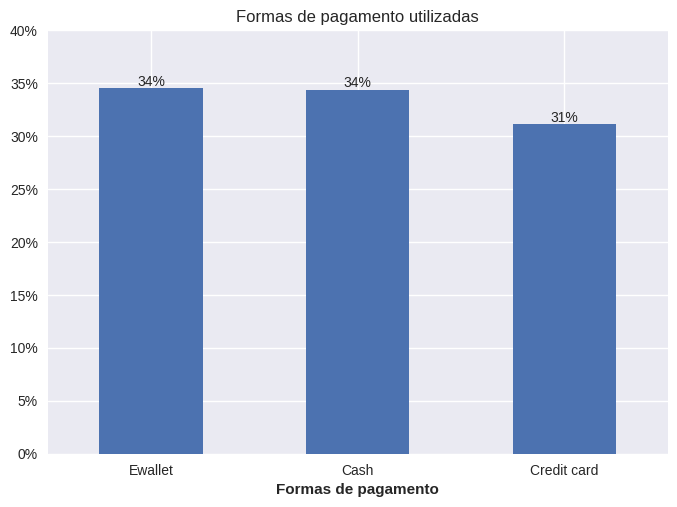

In [ ]:
ax = sm_pay.plot(kind='bar')
plt.title("Formas de pagamento utilizadas")
plt.xlabel("Formas de pagamento", weight='heavy')
plt.xticks(rotation=0)

#formatando y
valores_atuais = plt.gca().get_yticks() #recolhendo as posições atuais
ax.yaxis.set_ticks(valores_atuais) #configurando novas posições
plt.gca().set_yticklabels(['{:,.0%}'.format(i) for i in valores_atuais]) #formatando as labels

#bar_labels
ax.bar_label(ax.containers[0], fmt='{:,.0%}')


Os pagamentos foram feitos de modo equilibrado entre as três formas de pagamentos possíveis. Temos que praticamente a mesma quantidade clientes que pagaram em dinheiro também pagaram com carteira virtual, sendo cartão de crédito a opção menos popular, mas ainda signficativa.

#cogs

O custo das mercadorias vendidas.

In [ ]:
sm['cogs']

0      522.83
1       76.40
2      324.31
3      465.76
4      604.17
        ...  
995     40.35
996    973.80
997     31.84
998     65.82
999    618.38
Name: cogs, Length: 1000, dtype: float64

In [ ]:
#Estatística básica
sm['cogs'].describe()

count    1000.00000
mean      307.58738
std       234.17651
min        10.17000
25%       118.49750
50%       241.76000
75%       448.90500
max       993.00000
Name: cogs, dtype: float64

A média de custo de mercadoria vendida foi de **307,58**, com o menor valor registrado de **10,17** e o maior de **993**, 50% dos custos de mercadoria vendida estão situados abaixo da faixa de **241,76**.

Text(0, 0.5, 'COGS')

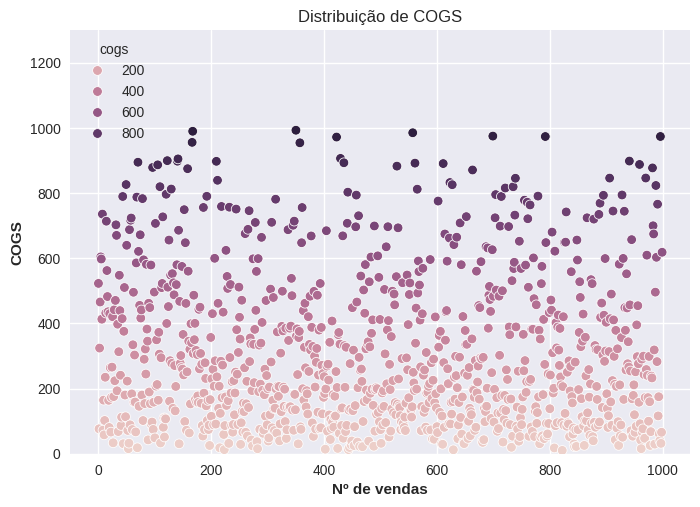

In [ ]:
sns.scatterplot(sm, x=sm.index, y=sm.cogs, hue="cogs")
plt.title("Distribuição de COGS")
plt.ylim(0,1300)
plt.xlabel('Nº de vendas',weight='heavy')
plt.ylabel('COGS', weight='heavy')


#gross margin percentage

Percentual de margem bruta.

gross margin percentage = (total - cogs)/total

In [ ]:
sm['gross margin percentage']

0      4.761905
1      4.761905
2      4.761905
3      4.761905
4      4.761905
         ...   
995    4.761905
996    4.761905
997    4.761905
998    4.761905
999    4.761905
Name: gross margin percentage, Length: 1000, dtype: float64

In [ ]:
sm['gross margin percentage'].describe()

count    1000.000000
mean        4.761905
std         0.000000
min         4.761905
25%         4.761905
50%         4.761905
75%         4.761905
max         4.761905
Name: gross margin percentage, dtype: float64

A porcentual de margem bruta é constante para todas as vendas registradas.

#gross income

Lucro bruto (*total*-*cogs*).

In [ ]:
sm['gross income']

0      26.1415
1       3.8200
2      16.2155
3      23.2880
4      30.2085
        ...   
995     2.0175
996    48.6900
997     1.5920
998     3.2910
999    30.9190
Name: gross income, Length: 1000, dtype: float64

In [ ]:
#Estatística básica
sm['gross income'].describe()

count    1000.000000
mean       15.379369
std        11.708825
min         0.508500
25%         5.924875
50%        12.088000
75%        22.445250
max        49.650000
Name: gross income, dtype: float64

A média de lucro bruto por venda foi de **15.37**, com a menor receita bruta numa venda de **0,50** e a maior sendo **49,65**.

**Pergunta:** qual o total de lucro bruto gerado? E qual o total de lucro bruto gerado por mês?

In [ ]:
total_gross_income = sm['gross income'].sum()
total_gross_income

15379.368999999999

O lucro bruto em três meses foi de **15.379,37**.

In [ ]:
#lucro bruto por mês
gi_per_month = sm.groupby(sm.Date.dt.month)["gross income"].sum()
gi_per_month

Date
1    5537.708
2    4629.494
3    5212.167
Name: gross income, dtype: float64

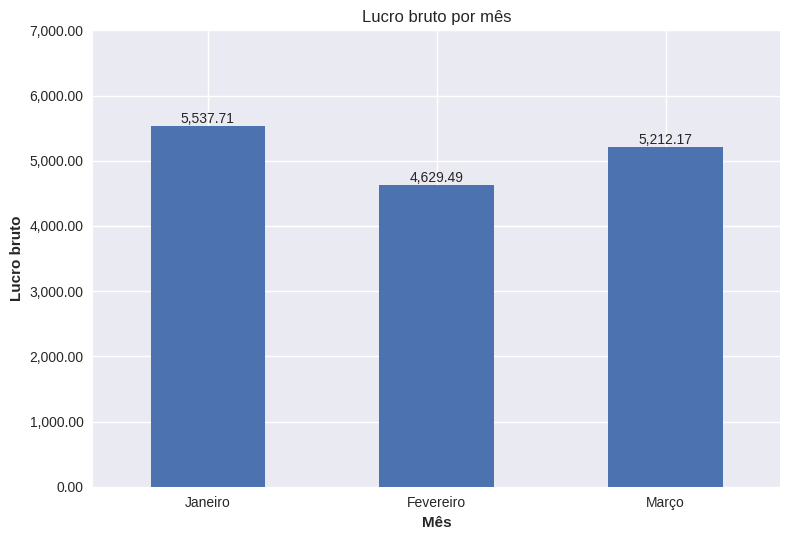

In [ ]:
_=ax = gi_per_month.plot(kind='bar')
_=plt.title("Lucro bruto por mês")
_=plt.xlabel("Mês", weight='heavy')
_=plt.ylabel("Lucro bruto", weight='heavy')
_=plt.ylim(0, 6500)
_=plt.xticks(np.arange(3), labels=['Janeiro','Fevereiro','Março'], rotation = 0)

#configurando y
valores_atuais = plt.gca().get_yticks()
ax.yaxis.set_ticks(valores_atuais)
plt.gca().set_yticklabels(['{:,.2f}'.format(i) for i in valores_atuais])

#bar label
_=ax.bar_label(ax.containers[0], fmt='{:,.2f}')

_=plt.tight_layout()



Como esperado, Janeiro foi o mês com maior lucro bruto, seguido por Março e com o mês de Fevereiro sendo o de menor lucro bruto registrado.

#Rating

Classificação de estratificação do cliente em sua experiência geral de compra (em uma escala de 1 a 10).

In [ ]:
sm['Rating']

0      9.1
1      9.6
2      7.4
3      8.4
4      5.3
      ... 
995    6.2
996    4.4
997    7.7
998    4.1
999    6.6
Name: Rating, Length: 1000, dtype: float64

In [ ]:
sm['Rating'].describe()

count    1000.00000
mean        6.97270
std         1.71858
min         4.00000
25%         5.50000
50%         7.00000
75%         8.50000
max        10.00000
Name: Rating, dtype: float64

A média de avaliação é **6,97**. A menor avaliação foi de **4** pontos, com a maior nota sendo **10**.

**Pergunta:** qual a avaliação mais frequênte?


In [ ]:
sm['Rating'].value_counts()

6.0     26
6.6     24
4.2     22
9.5     22
6.5     21
        ..
4.0     11
5.3     11
8.3     11
4.6      8
10.0     5
Name: Rating, Length: 61, dtype: int64

Text(0.5, 0, 'nº de avaliações')

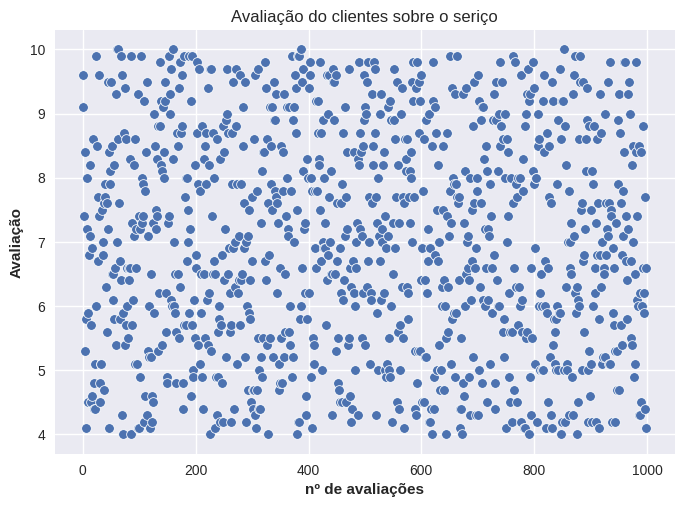

In [ ]:
sns.scatterplot(sm, x=sm.index, y=sm['Rating'])
plt.title("Avaliação do clientes sobre o seriço")
plt.ylabel("Avaliação", weight='heavy')
plt.xlabel("nº de avaliações", weight='heavy')


#Análise exploratória bivariada e multivariada

Nessa seção exploro mais os dados combinando diferentes features para extrair mais informações. Aqui também estabelecerei mais perguntas para serem respondidas com os dados.

algumas questões interessantes para serem respondidas nessa etapa estão listadas a seguir.

- Quais as diferenças entre os consumidores homens e mulheres? Existe relação entre gênero e receita bruta? Qual a forma de pagamento mais popular entre os grupos? E que produtos tendem a comprar mais?
- Quais linhas de produtos foram mais rentáveis? Quais foram as menos rentáveis?
- Qual filial está produzindo melhor retorno? Qual está produzindo menos?
- Existe alguma relação entre avaliação do cliente e o lucro? Quais filiais têm as melhores médias de avaliação?

#Gênero e comportamento de compra: análise de perfil.

In [ ]:
pd.crosstab(sm.City,sm.Gender)

Gender,Female,Male
City,,
Mandalay,162,170
Naypyitaw,178,150
Yangon,161,179


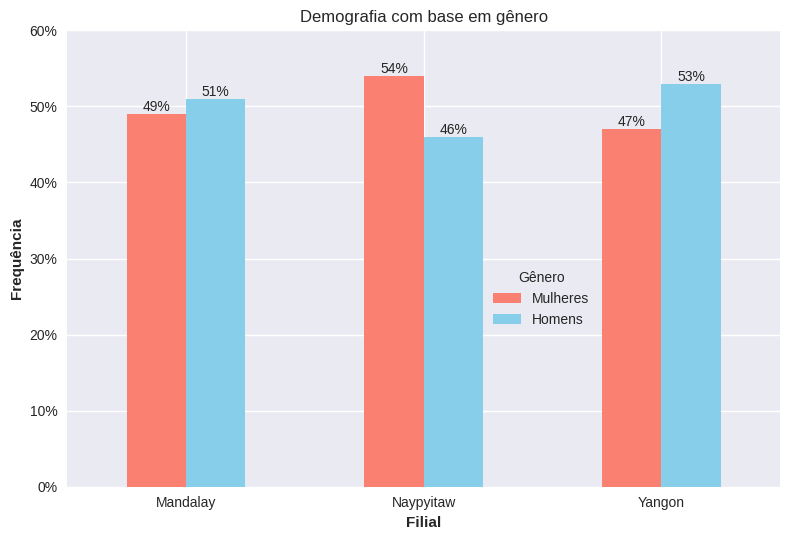

In [ ]:
city_gen = pd.crosstab(sm.City,sm.Gender, normalize='index').round(2)

ax=city_gen.plot(kind='bar', color=['Salmon','skyblue'])
_=plt.title("Demografia com base em gênero")
_=plt.xlabel("Filial", weight='heavy')
_=plt.ylabel("Frequência", weight='heavy')
_=plt.xticks(rotation=0)
_=plt.legend(title='Gênero', labels=["Mulheres","Homens"], bbox_to_anchor=(0.5, 0., 0.25, 0.5))

valores_atuais = plt.gca().get_yticks()
ax.yaxis.set_ticks(valores_atuais)
plt.gca().set_yticklabels('{:,.0%}'.format(i) for i in valores_atuais)

#label
for c in ax.containers:
  ax.bar_label(c, fmt='{:,.0%}')

_=plt.tight_layout()


A proporção entre mulheres e homens parece bem balanceada na filial de **Mandalay**, em **Yangon** verifica-se uma mais proporção de homens como cliente e **Naypyitaw** com mais mulheres no corpo de clientes.


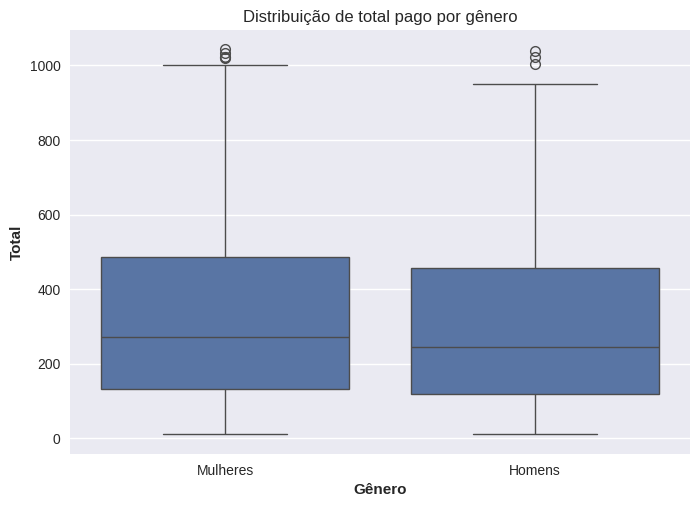

In [ ]:
# Existe relação entre gênero e receita bruta?
_= sns.boxplot(data=sm,x=sm.Gender, y=sm.Total)
_= plt.title("Distribuição de total pago por gênero")
_= plt.xlabel("Gênero", weight='heavy')
_= plt.ylabel("Total", weight='heavy')
_= plt.xticks(np.arange(2), ["Mulheres","Homens"])

As duas distribuições são semelhantes, contudo aparentemente mulheres têm uma tendência a ter um gasto maior nas compras. Temos a presença de gastos que destoam da maioria dos dados em ambos os grupos.

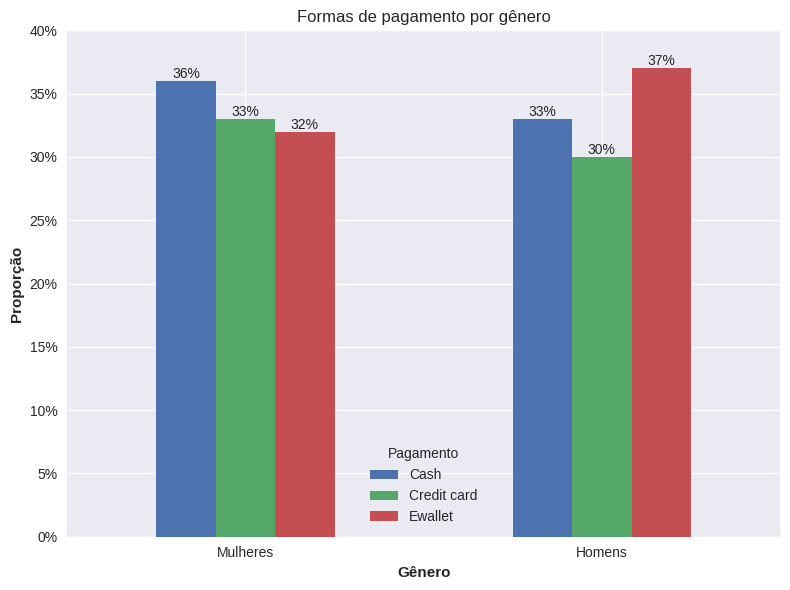

In [ ]:
gen_pay1 = pd.crosstab(sm.Gender, sm.Payment, normalize='index').round(2)

ax = gen_pay1.plot(kind='bar', figsize=[8,6] )

#configuração
_=plt.title("Formas de pagamento por gênero")
_=plt.xlabel("Gênero", weight='heavy')
_=plt.ylabel("Proporção", weight='heavy')
_=plt.xticks(np.arange(2), ["Mulheres","Homens"], rotation=0)
_=plt.legend(title='Pagamento')

#formatação
valores_atuais1 = plt.gca().get_yticks()
ax.yaxis.set_ticks(valores_atuais1)
plt.gca().set_yticklabels(['{:,.0%}'.format(i) for i in valores_atuais1])
#label
for c in ax.containers:
  label = [str(int(v.get_height()*100))+'%' for v in c]
  ax.bar_label(c, labels=label)

_=plt.tight_layout()

A forma de pagamento mais popular entre as mulheres é **cash**, sendo **Ewallet** a forma menos popular. Já entre os homens, a forma mais popular de pagaemnto foi **Ewallet**, a menos popular sendo **credit card**.

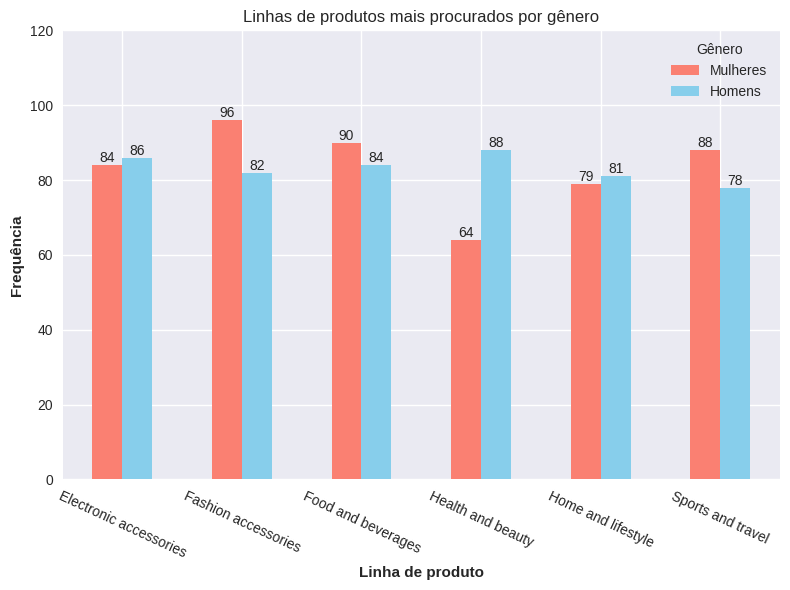

In [ ]:
ax = pd.crosstab( sm["Product line"], sm["Gender"]).plot(kind='bar', figsize=[8,6], color = ['Salmon', 'skyblue'])

_=plt.title("Linhas de produtos mais procurados por gênero")
_=plt.xlabel("Linha de produto", weight='heavy')
_=plt.ylabel("Frequência", weight='heavy')
_=plt.ylim(0,120)
_=plt.xticks(rotation=-25)
_=plt.legend(title="Gênero", labels=["Mulheres","Homens"])

#label
for c in ax.containers:
   label=[v.get_height() for v in c]
   ax.bar_label(c, labels=label)

_=plt.tight_layout()

A procura pelos diferentes tipo de produtos parece balanceada por parte de homens e mulheres. Contudo, curiosamente os produtos de **Saúde e Beleza** foram mais comprados por homens do que por mulheres. **Acessórios de moda** e **Esportes e viagem** foram mais procurados por mulheres do que por homens.

In [ ]:
pd.crosstab(sm["Gender"], sm["Customer type"], normalize='index')

Customer type,Member,Normal
Gender,,
Female,0.520958,0.479042
Male,0.480962,0.519038


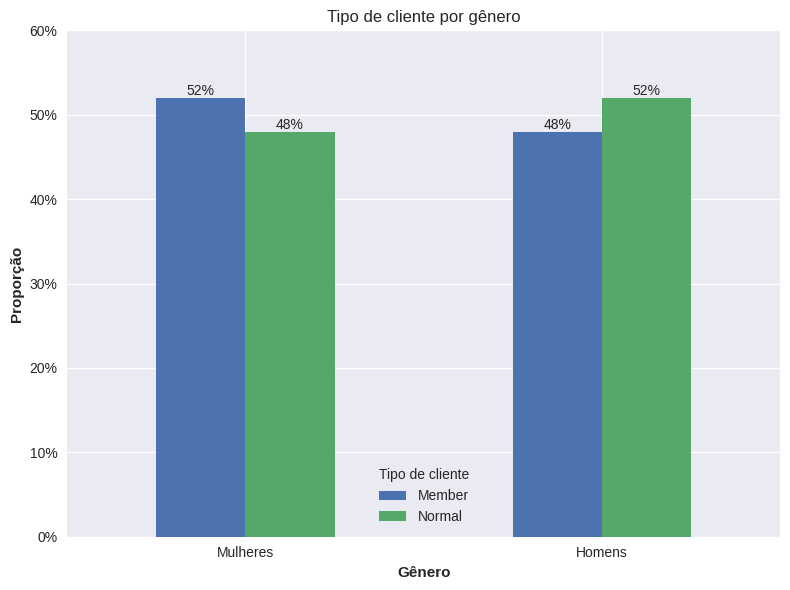

In [ ]:
gen_ct = (pd.crosstab(sm["Gender"], sm["Customer type"])/sm["Customer type"].value_counts()).round(2)

ax = gen_ct.plot(kind='bar', figsize=[8,6] )

#configuração
_=plt.title("Tipo de cliente por gênero")
_=plt.xlabel("Gênero", weight='heavy')
_=plt.ylabel("Proporção", weight='heavy')
_=plt.xticks(np.arange(2), ["Mulheres","Homens"], rotation=0)
_=plt.legend(title='Tipo de cliente')

#formatação
valores_atuais = plt.gca().get_yticks()
ax.yaxis.set_ticks(valores_atuais)
plt.gca().set_yticklabels(['{:,.0%}'.format(i) for i in valores_atuais])
#label
for c in ax.containers:
  label = [str(int(v.get_height()*100))+'%' for v in c]
  ax.bar_label(c, labels=label)

_=plt.tight_layout()

A princípio temos aparentemente uma leve tendência, a maior parte do público feminino é do tipo **Membro**, já no que diz respeito aos homens o que se enxerga é o contrário, a maioria é do tipo **Normal**.

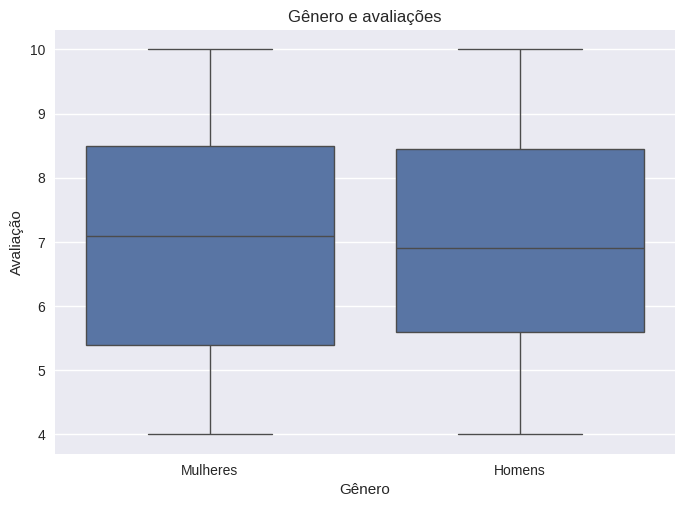

In [ ]:
_=sns.boxplot(data=sm, x=sm.Gender, y=sm.Rating)
_=plt.title("Gênero e avaliações")
_=plt.xlabel("Gênero")
_=plt.ylabel("Avaliação")
_=plt.xticks(np.arange(2), ["Mulheres","Homens"])

Apesar de ambos os grupos terem comportamento semelhntes no que diz respeito à avaliação, homens aparentemente tendem a avaliar com melhores notas do que mulheres.

#Tipos de produtos e retorno

Aqui foco na relação entre os tipos de produtos oferecidos (linhas de produtos) e o seu desempenho em vendas nos últimos 3 meses.

In [ ]:
#Quais linhas venderam mais?
prod_total = sm.groupby(sm['Product line'])["Total"].sum().sort_values(ascending=False)

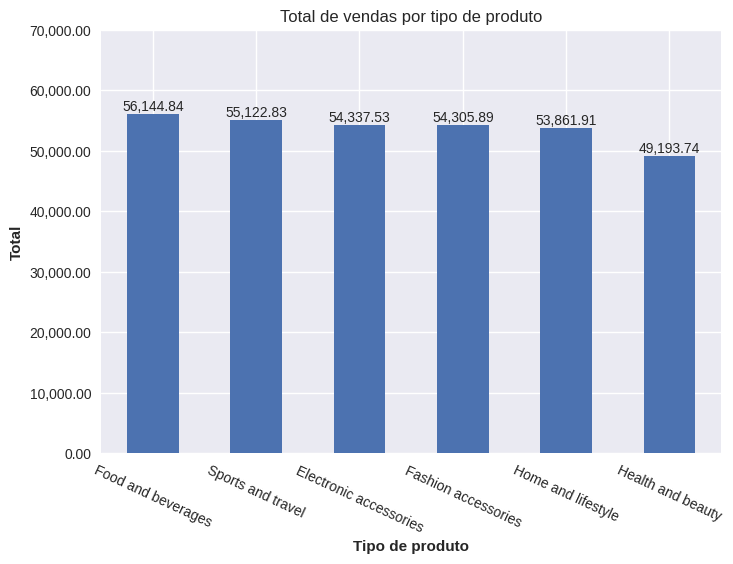

In [ ]:
ax=prod_total.plot(kind='bar')
_=plt.title("Total de vendas por tipo de produto")
_=plt.xlabel("Tipo de produto", weight='heavy')
_=plt.ylabel("Total", weight='heavy')
_=plt.xticks(rotation=-25)
_=plt.ylim(0, 70000)

#formatando y

valores_atuais = plt.gca().get_yticks()
ax.yaxis.set_ticks(valores_atuais)
plt.gca().set_yticklabels(["{:,.2f}".format(i) for i in valores_atuais])

#labels
for c in ax.containers:

  ax.bar_label(c, fmt='{:,.2f}')



Todas as linhas de produtos tiveram desempenho semelhante nas vendas, com exceção de "Health and beauty". Vale a pena investigar para identificar medidas a serem tomadas para melhorar seu desempenho.

#Retorno por filial.

Nessa seção identifico qual foi o retorno total e o lucro bruto por filial.



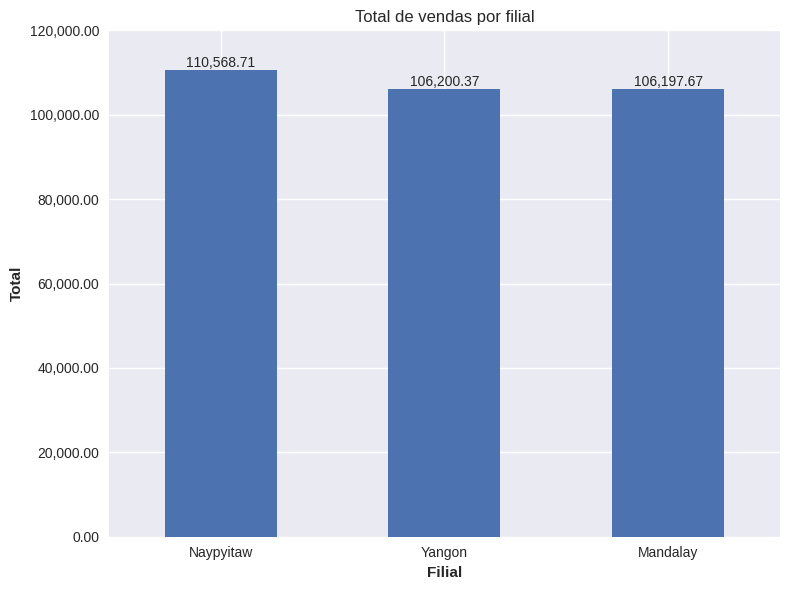

In [ ]:
#A=Mandalay, B=Naypytiaw, C=Yangon
city_total = sm.groupby(sm.City)["Total"].sum().sort_values(ascending=False)

ax=city_total.plot(kind='bar', figsize=[8,6])
_=plt.title("Total de vendas por filial")
_=plt.xlabel("Filial", weight='heavy')
_=plt.ylabel("Total", weight='heavy')
_=plt.xticks(rotation=0)

#formatando y

valores_atuais = plt.gca().get_yticks()
ax.yaxis.set_ticks(valores_atuais)
plt.gca().set_yticklabels(["{:,.2f}".format(i) for i in valores_atuais])

#labels
for c in ax.containers:

  ax.bar_label(c, fmt='{:,.2f}')

_=plt.tight_layout()

A filial de **Naypyitaw** foi a com maior número de vendas, as filiais de **Yangon** e **Mandalay** tiveram desempenho semelhante no período analisado.

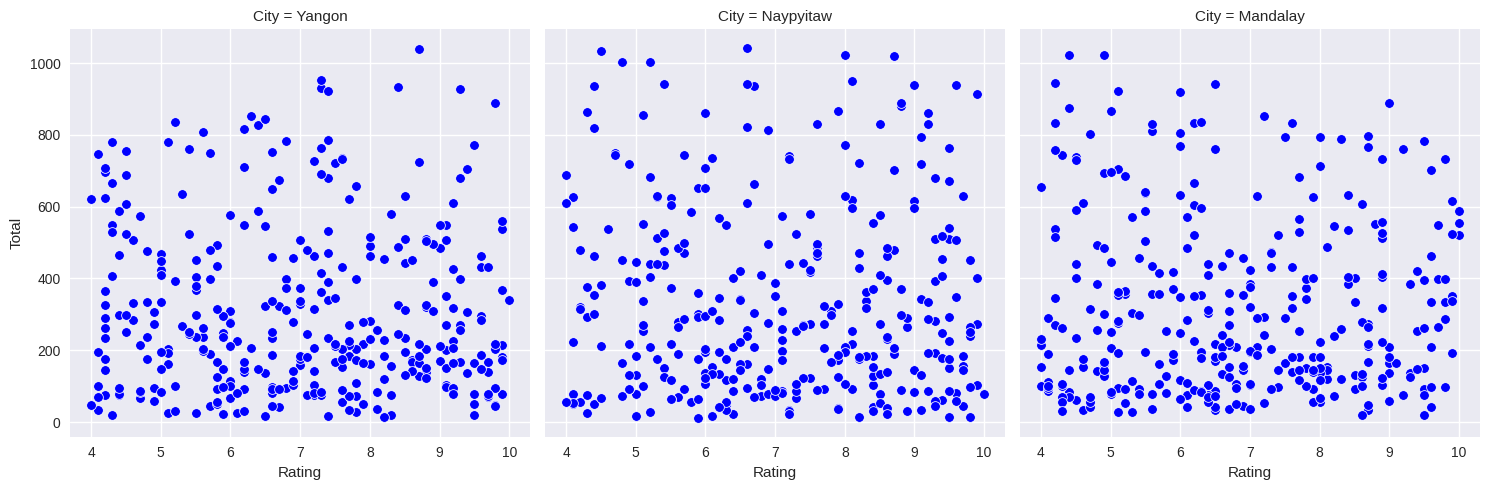

In [ ]:
_ = sns.relplot(x = 'Rating', y = 'Total', data=sm, col='City', color='b')

A princípio, não há relação clara entre o Rating e o total em venda.

In [ ]:
#Informação sobre a avaliação das filiais.
sm.groupby(sm.City).agg({'Rating':['min','max','mean','median']})

Rating                       
             min   max      mean median
City                                   
Mandalay     4.0  10.0  6.818072    6.7
Naypyitaw    4.0  10.0  7.072866    7.1
Yangon       4.0  10.0  7.027059    7.1

As avaliações de todas as filiais são semelhantes, com a filial de Mandalay com a menor média de avaliação.

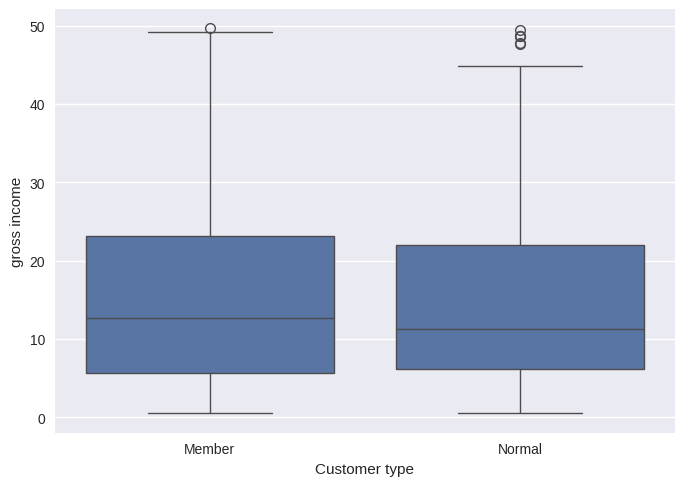

In [ ]:
_=sns.boxplot(data=sm, x=sm['Customer type'],y=sm['gross income'])

In [ ]:
sm.groupby(sm['Customer type']).agg({'gross income':['max','min', 'mean','median']})

gross income                           
                       max     min       mean  median
Customer type                                        
Member               49.65  0.5085  15.609110  12.668
Normal               49.49  0.6045  15.148707  11.306

Não há diferenças grandes entre os lucros brutos referentes ao tipo de cliente.



#Conclusão

A análise buscou entender melhor as diferentes variávies relacionadas a vendas em supermercados ajudando a responder perguntas pertinentes como identificar perfil de cliente e fornecer informação de modo geral com foco em quantidade de vendas e lucro bruto.

Principais insights produzidos desta análise:
- O corpo de clientes é composto por 50% homens e 50% mulheres.
- Os meses com **melhor desempenho** em vendas foram **Janeiro** e **Março**.
- O **horário com maior valor** total em vendas foi às **19h**.
- Os tipos de pagamentos mais populares são **Ewallet**  e **Dinheiro**. Sendo **dinheiro** a forma mais popular de pagamento entre as mulheres e **Ewallet** a mais popular entre os homens.
- As diferentes linhas de produtos tiveram desempenho bastante similar, com exceção para "health and beauty" com desempenho de vendas abaixo das demais.
- Foi possível identificar uma preferência do público masculino quanto aos produtos da linha "Health and beauty" ao passo que mulheres tendem a buscar mais produtos das linhas "Fashion" e "Sports and travel" do que homens.
- Mulheres tendem a serem clientes do tipo membro mais do que homens, já homens tendem a serem clientes do tipo normal.
- A filial com maior quantidade de vendas é a de **Naypyitaw**, as filiais **Mandalay e Yangon** ficaram praticamente iguais em termos de vendas.

